In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('./house_prices_dataset.csv') 

In [3]:
print(df.head())
df.shape

      area      price
0  2231.88  558852.17
1  2524.92  632260.29
2  1527.65  382994.25
3  1986.09  497607.86
4  2920.16  730870.84


(100, 2)

<AxesSubplot:xlabel='area', ylabel='price'>

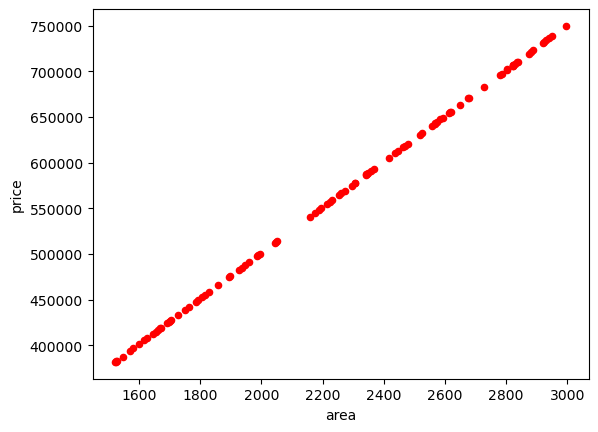

In [4]:
df.plot.scatter(x='area',y='price',c='red')

In [5]:
def calculate_prediction(x, w, b):
    return (w * x) + b

In [6]:
def calculated_squared_error(row,w,b):
    y_hat = calculate_prediction(row['area'],w,b)
    y = row['price']
    return (y_hat - y)**2

In [7]:
def calculate_cost(w,b):
    cost = 0
    m = df.shape[0]
    for index,row in df.iterrows():
        cost = cost + calculated_squared_error(row,w,b)
    return((1/2*m)) * cost

In [8]:
def calculate_gradients(w,b): # j is cost function & d is derivetive 'dj_dw' & dj_db
    m = df.shape[0]
    dj_dw = 0
    dj_db = 0
    for index, row in df.iterrows():
        y_hat = calculate_prediction(row['area'],w,b)
        y = row['price']
        dj_dw += ((y_hat-y)* row['area'])
        dj_db += ((y_hat-y))

    dj_dw = dj_dw/m
    dj_db = dj_db/m

    dj_dw = w - (alpha*dj_dw)
    dj_db = b - (alpha*dj_db)

    return [dj_dw,dj_db]

In [9]:
def gradient_descent(alpha, epochs, init_w, init_b, print_interval):
    local_w = init_w
    local_b = init_b
    for i in range(0, epochs):
        gradients = calculate_gradients(local_w, local_b)
        new_w, new_b = gradients
        local_w = new_w
        local_b = new_b
        if (i + 1) % print_interval == 0:
            print("Epoch:", i + 1)
            print("w change:", new_w)
            print("b change:", new_b)
    return [local_w, local_b]

In [10]:
alpha = 0.0000001
epochs = 1000
initial_w = 0
initial_b = 0
print_interval = 100  # Specify the interval for printing changes
final_w, final_b = gradient_descent(alpha, epochs, initial_w, initial_b, print_interval)

Epoch: 100
w change: 250.4254478061784
b change: 0.10746835745449701
Epoch: 200
w change: 250.42544763969588
b change: 0.10785770980462486
Epoch: 300
w change: 250.42544747321338
b change: 0.10824706200372243
Epoch: 400
w change: 250.42544730673097
b change: 0.10863641405179
Epoch: 500
w change: 250.42544714024865
b change: 0.10902576594882757
Epoch: 600
w change: 250.42544697376638
b change: 0.10941511769483511
Epoch: 700
w change: 250.42544680728417
b change: 0.10980446928981277
Epoch: 800
w change: 250.42544664080202
b change: 0.11019382073376056
Epoch: 900
w change: 250.42544647431995
b change: 0.11058317202667854
Epoch: 1000
w change: 250.42544630783792
b change: 0.11097252316856676


In [11]:
print("Final weights (w):", final_w)
print("Final biases (b):", final_b)


Final weights (w): 250.42544630783792
Final biases (b): 0.11097252316856676


In [12]:
area = 2231.88
predicted_price = calculate_prediction(area, final_w, final_b)
print("Predicted price for an area of", area, ":", predicted_price)

Predicted price for an area of 2231.88 : 558919.6560780605


In [13]:
y_hat = list()
for area in df['area']:
    predicted_price = calculate_prediction(area, final_w, final_b)
    y_hat.append(predicted_price)



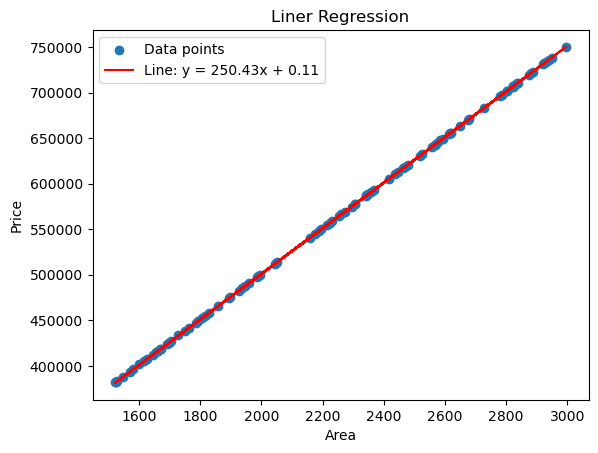

In [14]:
#draw a scatter with line
x_values = np.array(df["area"])
y_values = np.array(df["price"])
plt.scatter(x_values, y_values)
plt.plot(x_values, calculate_prediction(x_values, final_w, final_b), color='red')
plt.xlabel('Area')
plt.ylabel('Price')
plt.legend(labels=['Data points','Line: y = {:.2f}x + {:.2f}'.format(final_w, final_b)])
plt.title('Liner Regression')
plt.show()

In [15]:
from sklearn.metrics import r2_score

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.25.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [16]:
r2_score(y_values,y_hat)

0.9999960102191752

In [21]:
calculate_cost(250.42544630783792,0.11097252316856676)

254257629.85639274

In [24]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
mean_squared_error(y_values,y_hat)

50851.52597127858